In [30]:
def indexer():
    import re
    import datetime
    target = re.compile(r"[^\w\s]|\s")
    return target.sub('',str(datetime.datetime.now()))

In [89]:
import matplotlib.pyplot
from IPython import display
import sympy
import numpy

In [90]:
x = sympy.symbols('x')

fx = 3*x**2-3*x+4
fx

3*x**2 - 3*x + 4

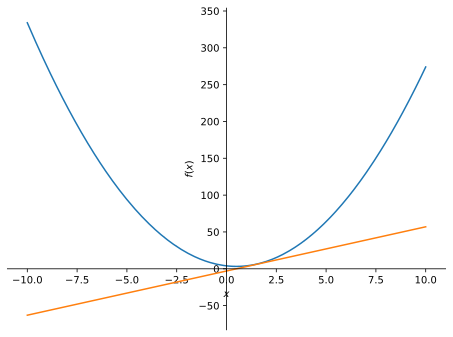

In [91]:
sympy.plotting.plot(fx,sympy.diff(fx))

In [92]:
sympy.diff(fx)

6*x - 3

In [93]:


def fx(x):
    return 3*x**2-3*x+4

def deriv(x):
    return 6*x-3

x = numpy.linspace(-2,2,2222)




In [94]:
localmin = numpy.random.choice(x,1)




learning_rate = .01
epochs = 100

# initialize the output matriz
modelparams = numpy.zeros((epochs,2))

for i in range(epochs):
    grad = deriv(localmin)
    localmin -=learning_rate*grad
    modelparams[i,:] = localmin[0],grad[0]
    
localmin

array([0.49866725])

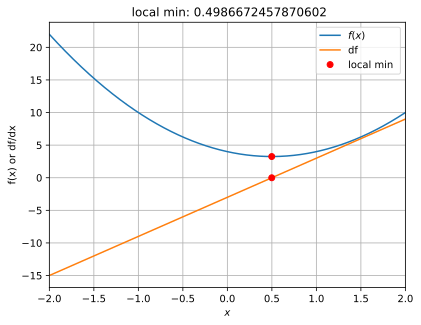

In [95]:


matplotlib.pyplot.plot(x,fx(x),x,deriv(x))
matplotlib.pyplot.plot(localmin,fx(localmin),'ro')
matplotlib.pyplot.plot(localmin,deriv(localmin),'ro')

matplotlib.pyplot.xlabel('$x$')
matplotlib.pyplot.ylabel('f(x) or df/dx')
matplotlib.pyplot.legend(['$f(x)$','df','local min '])
matplotlib.pyplot.grid('on')
matplotlib.pyplot.title(' local min: %s'%localmin[0])
matplotlib.pyplot.xlim(x[[0,-1]])
matplotlib.pyplot.show()

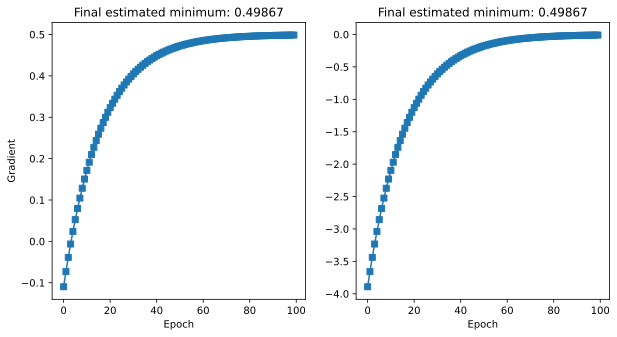

In [96]:
fig,ax = matplotlib.pyplot.subplots(1,2,figsize=(10,5))

for i in range(2):
    ax[i].plot(modelparams[:,i],'s-')
    ax[i].set_xlabel("Epoch")
    ax[i].set_title(f"Final estimated minimum: {localmin[0]:.5f}")
    
ax[0].set_ylabel("Local min")
ax[0].set_ylabel("Gradient")
matplotlib.pyplot.show()

In [97]:
def peaks(x,y):
    x,y = numpy.meshgrid(x,y)
    
    z = 3*(1-x)**2 * numpy.exp(-(x**2) - (y+1)**2) \
    - 10*(x/5 - x**3 - y**5) * numpy.exp(-x**2-y**2) \
    - 1/3*numpy.exp(-(x+1)**2-y**2)
    
    return z

In [98]:
# visualize the func
x = numpy.linspace(-3,3,201)
y = numpy.linspace(-3,3,201)

Z = peaks(x,y)

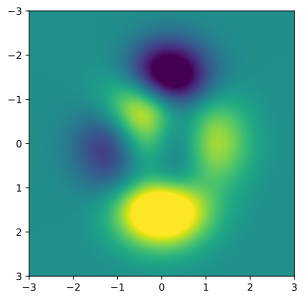

In [99]:
matplotlib.pyplot.imshow(Z,extent=[x[0],x[-1],y[-1],y[0]],origin='upper',vmin=-5,vmax=5)
matplotlib.pyplot.show()

In [100]:
sx,sy = sympy.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sympy.exp(-(sx**2) - (sy+1)**2) \
    - 10*(sx/5 - sx**3 - sy**5) * sympy.exp(-sx**2-sy**2) \
    - 1/3*sympy.exp(-(sx+1)**2-sy**2)
sZ

3*(1 - sx)**2*exp(-sx**2 - (sy + 1)**2) - (-10*sx**3 + 2*sx - 10*sy**5)*exp(-sx**2 - sy**2) - 0.333333333333333*exp(-sy**2 - (sx + 1)**2)

In [101]:
sympy.diff(sZ,sx)

-6*sx*(1 - sx)**2*exp(-sx**2 - (sy + 1)**2) + 2*sx*(-10*sx**3 + 2*sx - 10*sy**5)*exp(-sx**2 - sy**2) - (2 - 30*sx**2)*exp(-sx**2 - sy**2) - 0.333333333333333*(-2*sx - 2)*exp(-sy**2 - (sx + 1)**2) + 3*(2*sx - 2)*exp(-sx**2 - (sy + 1)**2)

In [102]:
df_x = sympy.lambdify((sx,sy),sympy.diff(sZ,sx),'sympy')
df_y = sympy.lambdify((sx,sy),sympy.diff(sZ,sy),'sympy')

In [103]:
df_x(1,1).evalf()

-1.07369833656079

In [104]:
localmin = [-0.5,-1]#numpy.random.rand(2)*4-2#
print(localmin)


learning_rate = .01
epochs = 1000

# initialize the output matriz
modelparams = numpy.zeros((epochs,2))

for i in range(epochs):
    dx = df_x(localmin[0],localmin[1])
    dy = df_y(localmin[0],localmin[1])
    grad = numpy.array([dx,dy])
    localmin = localmin - learning_rate*grad
    modelparams[i,:] = localmin

[-0.5, -1]


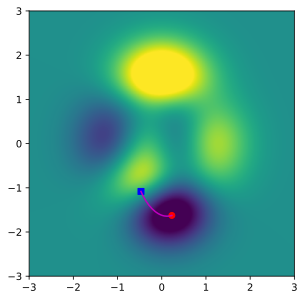

In [105]:
matplotlib.pyplot.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],origin='lower',vmin=-5,vmax=5)
matplotlib.pyplot.plot(modelparams[0,0],modelparams[0,1],'bs')
matplotlib.pyplot.plot(modelparams[-1,0],modelparams[-1,1],'ro')
matplotlib.pyplot.plot(modelparams[:,0],modelparams[:,1],'m')
matplotlib.pyplot.show()

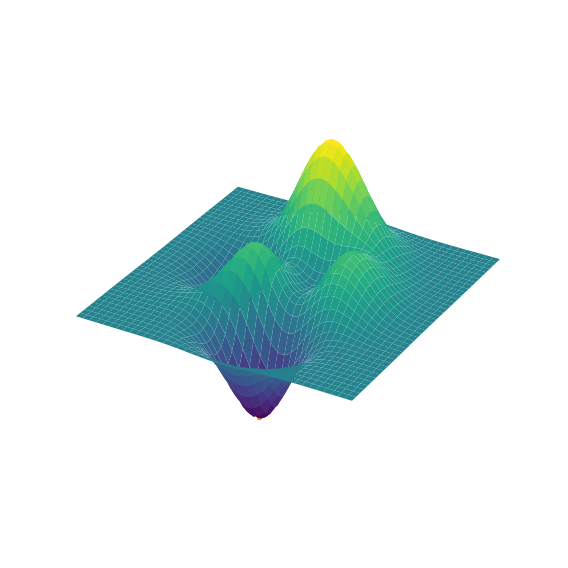

In [106]:
fig = matplotlib.pyplot.figure(figsize=(12,10))
ax = matplotlib.pyplot.axes(projection='3d')
X,Y = numpy.meshgrid(x,y)
ax.plot_surface(X,Y,Z,cmap='viridis')
ax.scatter(modelparams[0,0],modelparams[0,1],
           peaks(modelparams[0,0],modelparams[0,1]),'bs')
ax.scatter(modelparams[-1,0],modelparams[-1,1],
           peaks(modelparams[-1,0],modelparams[-1,1]),'ro')
ax.axis('off')
matplotlib.pyplot.show()

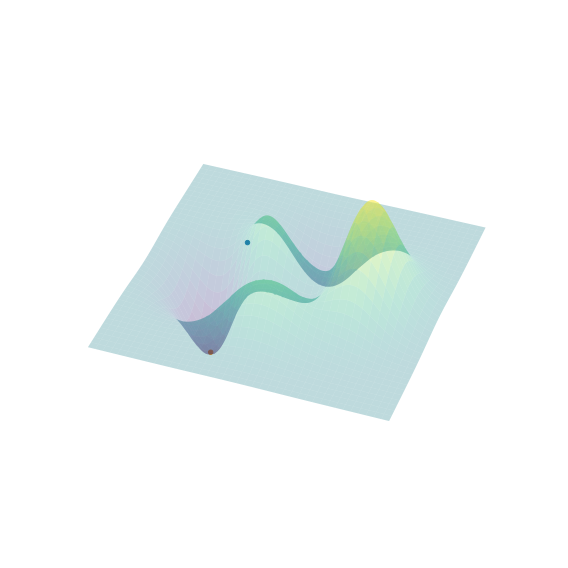

In [107]:
fig = matplotlib.pyplot.figure(figsize=(12,10))
ax = matplotlib.pyplot.axes(projection='3d')
X,Y = numpy.meshgrid(x,y)
ax.plot_surface(X,Y,Z,cmap='viridis',alpha=0.3)
ax.scatter(modelparams[0,0],modelparams[0,1],
           peaks(modelparams[0,0],modelparams[0,1]),'bs')
ax.scatter(modelparams[-1,0],modelparams[-1,1],
           peaks(modelparams[-1,0],modelparams[-1,1]),'ro')
ax.view_init(40,20)
ax.axis('off')
matplotlib.pyplot.show()